In [1]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
columns_df = pd.read_csv('green_tripdata_2016-12.csv', nrows = 1)

In [3]:
dtypes = {
    'VendorID': 'category',
    'store_and_fwd_flag': 'category',
    'RatecodeID': 'category',
    'PULocationID': 'category',
    'DOLocationID': 'category',
    'extra': 'category',
    'mta_tax': 'category',
    'improvement_surcharge': 'category',
    'payment_type': 'category',
    'trip_type': 'category',
}

In [4]:
df = pd.read_csv(
    'green_tripdata_2016-12.csv',
    header=None,
    skiprows=1,
    usecols = list(range(len(columns_df.columns))),
    names=columns_df.columns,
    dtype=dtypes,
    parse_dates=['lpep_pickup_datetime', 'lpep_dropoff_datetime']
)

In [5]:
df.dtypes

VendorID                       category
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag             category
RatecodeID                     category
PULocationID                   category
DOLocationID                   category
passenger_count                   int64
trip_distance                   float64
fare_amount                     float64
extra                          category
mta_tax                        category
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge          category
total_amount                    float64
payment_type                   category
trip_type                      category
dtype: object

In [6]:
df.shape

(1224158, 19)

In [7]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2016-12-01 00:00:54,2016-12-01 00:06:54,N,1,92,192,1,1.29,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
1,2,2016-12-01 00:52:41,2016-12-01 00:54:51,N,1,92,171,1,0.64,4.0,0.5,0.5,1.06,0.0,NaN,0.3,6.36,1,1
2,2,2016-12-01 00:10:39,2016-12-01 00:14:47,N,1,75,238,2,0.89,5.5,0.5,0.5,1.70,0.0,NaN,0.3,8.50,1,1
3,2,2016-12-01 00:12:16,2016-12-01 00:15:31,N,1,166,151,1,0.66,4.5,0.5,0.5,1.74,0.0,NaN,0.3,7.54,1,1
4,2,2016-12-01 00:29:22,2016-12-01 00:39:51,N,1,166,42,1,2.15,9.5,0.5,0.5,2.16,0.0,NaN,0.3,12.96,1,1


# 1. Characterize the data and comment about its quality 

In [8]:
df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,ehail_fee,total_amount
count,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,1.224158e+06,0.0,1.224158e+06
mean,1.362447e+00,2.618179e+00,1.159368e+01,1.128787e+00,9.456725e-02,NaN,1.399902e+01
std,1.036924e+00,2.806160e+00,9.793499e+00,2.216306e+00,8.808537e-01,NaN,1.112872e+01
min,0.000000e+00,0.000000e+00,-4.990000e+02,-1.056000e+01,-8.540000e+00,NaN,-4.990000e+02
25%,1.000000e+00,9.800000e-01,6.000000e+00,0.000000e+00,0.000000e+00,NaN,7.800000e+00
50%,1.000000e+00,1.700000e+00,9.000000e+00,0.000000e+00,0.000000e+00,NaN,1.080000e+01
75%,1.000000e+00,3.200000e+00,1.400000e+01,1.860000e+00,0.000000e+00,NaN,1.656000e+01
max,9.000000e+00,1.475000e+02,1.007000e+03,2.507000e+02,2.979800e+02,NaN,1.008300e+03


In [9]:
df.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                1224158
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                      0
dtype: int64

In [10]:
df.nunique()

VendorID                      2
lpep_pickup_datetime     930912
lpep_dropoff_datetime    929402
store_and_fwd_flag            2
RatecodeID                    6
PULocationID                241
DOLocationID                260
passenger_count              10
trip_distance              3052
fare_amount                 869
extra                         9
mta_tax                       3
tip_amount                 1821
tolls_amount                126
ehail_fee                     0
improvement_surcharge         3
total_amount               5815
payment_type                  5
trip_type                     2
dtype: int64

- The columns are all either completely missing (ehail_fee) or completely nonmissing (all of the other columns).
- There are 2 datetime columns: lpep_pickup_datetime, lpep_dropoff_datetime.
- The (non-datetime) continuous features are: trip_distance, fare_amount, tip_amount, tolls_amount, total_amount
    + passenger_count should also be modeled as continuous, since it's ordered
- The others should be modeled as categorical

# 2. Explore and visualize the data e.g. a histogram of trip distance 

Text(0.5, 0.98, 'Trip Distance (Full-Range)')

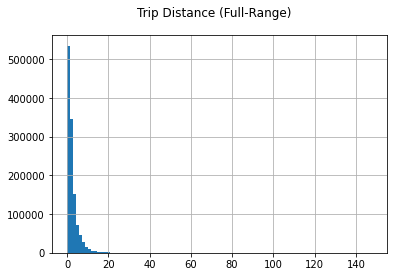

In [11]:
df.trip_distance.hist(bins=100)
pl.suptitle('Trip Distance (Full-Range)')

Text(0.5, 0.98, 'Trip Distance (Zoomed-In)')

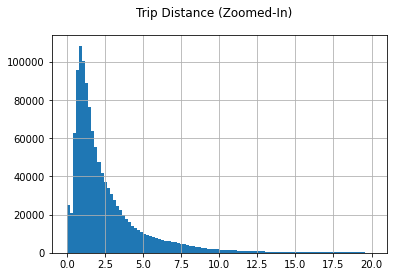

In [12]:
zoomed_trip_distance = df.loc[(df.trip_distance >= 0) & (df.trip_distance < 20), 'trip_distance']
zoomed_trip_distance.hist(bins=100)
pl.suptitle('Trip Distance (Zoomed-In)')

- Most trips are short, but there is a fat-tail of long trips
- There are some trips that are 0 miles. These might be mistakes, but I'm not sure so I won't delete them for now.

# 3. Find interesting trip statistics grouped by hour

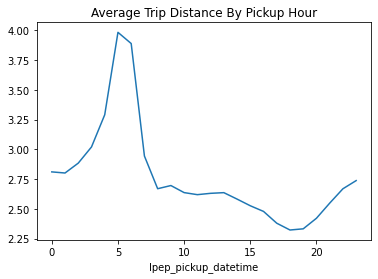

In [13]:
df.groupby(df.lpep_pickup_datetime.dt.hour).trip_distance.mean().plot(title='Average Trip Distance By Pickup Hour')

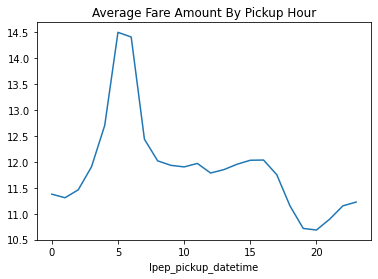

In [14]:
df.groupby(df.lpep_pickup_datetime.dt.hour).fare_amount.mean().plot(title='Average Fare Amount By Pickup Hour')

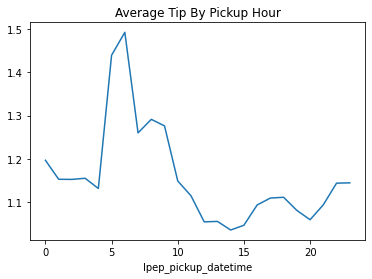

In [15]:
df.groupby(df.lpep_pickup_datetime.dt.hour).tip_amount.mean().plot(title='Average Tip By Pickup Hour')

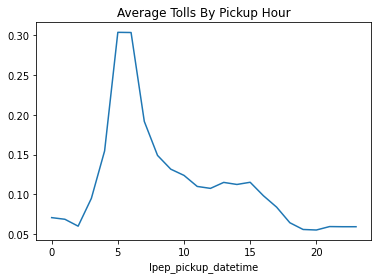

In [16]:
df.groupby(df.lpep_pickup_datetime.dt.hour).tolls_amount.mean().plot(title='Average Tolls By Pickup Hour')

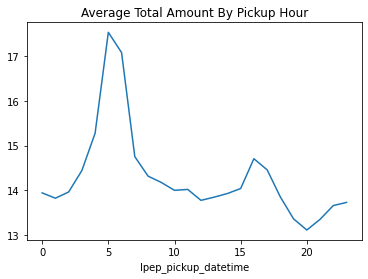

In [17]:
df.groupby(df.lpep_pickup_datetime.dt.hour).total_amount.mean().plot(title='Average Total Amount By Pickup Hour')

# 4. The taxi drivers want to know what kind of trip yields better tips. Can you build a model  for them and explain the model? 

Since we don't care about predictive performance here, but do care about statistical inference and interpretability, linear regression is a good choice.

In [18]:
# convert datetimes to hour and minute
df['pickup_hour'] = df.lpep_pickup_datetime.dt.hour.astype('category')  # treat as categorical
df['dropoff_hour'] = df.lpep_dropoff_datetime.dt.hour.astype('category')

In [19]:
# create trip_length_s feature for trip length in seconds
df['trip_length_s'] = (df.lpep_dropoff_datetime - df.lpep_pickup_datetime).dt.seconds

In [20]:
y = df.tip_amount

In [21]:
# delete the features that won't be used in the regression
X = df.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'ehail_fee', 'tip_amount', 'total_amount'], axis=1)

In [22]:
# consolidate location categories with less than 30 examples into one "Other" category (since we won't be able to say much about these categories anyway)
value_counts = X.PULocationID.value_counts()
mask = value_counts.lt(30)
X['PULocationID'] = np.where(X.PULocationID.isin(value_counts[mask].index), 'Other', X.PULocationID)
value_counts = X.DOLocationID.value_counts()
mask = value_counts.lt(30)
X['DOLocationID'] = np.where(X.DOLocationID.isin(value_counts[mask].index), 'Other', X.DOLocationID)

In [23]:
# create model matrix by one-hot-encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)

In [24]:
# solve using sklearn instead of statsmodels to avoid inefficient matrix inversion
mod = LinearRegression().fit(X, y)

In [25]:
coef_df = pd.DataFrame(['_intercept'] + list(X.columns))

In [26]:
coefs = [mod.intercept_] + mod.coef_.tolist()

In [27]:
coef_df['coef'] = coefs

calculate standard errors of the coefs (needed to calculate confidence intervals)
- https://stackoverflow.com/a/58357360/6238166

In [28]:
N = len(X)
p = len(X.columns) + 1
X_with_intercept = np.empty(shape=(N, p), dtype=np.float)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = X.values
residuals = y - mod.predict(X)
residual_sum_of_squares = residuals.T @ residuals
sigma_squared_hat = residual_sum_of_squares / (N - p)
var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat
standard_errors = [var_beta_hat[i, i] ** 2 for i in range(p)]

In [29]:
coef_df['standard_error'] = standard_errors

In [30]:
coef_df['lower_bound'] = coef_df.coef - 1.96 * coef_df.standard_error
coef_df['upper_bound'] = coef_df.coef + 1.96 * coef_df.standard_error

In [31]:
coef_df.rename({0: 'feature'}, axis=1, inplace=True)

In [32]:
continuous_features = ['trip_distance', 'fare_amount', 'tolls_amount', 'trip_length_s']

In [33]:
coef_df.loc[coef_df.feature.isin(continuous_features)]

,feature,coef,standard_error,lower_bound,upper_bound
2,trip_distance,0.145051,1.387937e-12,0.145051,0.145051
3,fare_amount,0.026220,7.700846e-15,0.026220,0.026220
4,tolls_amount,0.112159,1.496352e-11,0.112159,0.112159
5,trip_length_s,-0.000003,3.544142e-27,-0.000003,-0.000003


In [34]:
# categorical features
coef_df.loc[~coef_df.feature.isin(continuous_features)].sort_values('coef', ascending=False)[:25]

,feature,coef,standard_error,lower_bound,upper_bound
23,PULocationID_122,11.019227,0.007434,11.004655,11.033798
0,_intercept,7.268486,0.000721,7.267072,7.269900
86,PULocationID_203,7.207925,0.007158,7.193895,7.221954
442,mta_tax_0.5,2.153955,0.002753,2.148558,2.159351
98,PULocationID_218,1.545891,0.002969,1.540071,1.551710
441,mta_tax_0,1.495675,0.002892,1.490007,1.501344
78,PULocationID_194,1.292255,0.008411,1.275768,1.308742
9,RatecodeID_3,1.162391,0.000072,1.162249,1.162533
37,PULocationID_138,0.924991,0.000989,0.923052,0.926930
132,PULocationID_265,0.840503,0.000512,0.839498,0.841507


In [35]:
# continuous features
coef_df.loc[coef_df.feature.isin(continuous_features)].sort_values('coef', ascending=False)[:25]

,feature,coef,standard_error,lower_bound,upper_bound
2,trip_distance,0.145051,1.387937e-12,0.145051,0.145051
4,tolls_amount,0.112159,1.496352e-11,0.112159,0.112159
3,fare_amount,0.026220,7.700846e-15,0.026220,0.026220
5,trip_length_s,-0.000003,3.544142e-27,-0.000003,-0.000003


In [36]:
# look at scale of continuous features (to see how big an effect the coefficients have)
df[continuous_features]

,trip_distance,fare_amount,tolls_amount,trip_length_s
0,1.29,6.5,0.0,360
1,0.64,4.0,0.0,130
2,0.89,5.5,0.0,248
3,0.66,4.5,0.0,195
4,2.15,9.5,0.0,629
...,...,...,...,...
1224153,1.20,6.0,0.0,314
1224154,1.00,5.5,0.0,225
1224155,5.30,18.5,0.0,949
1224156,1.60,8.5,0.0,615


- This model shows which features are most (linearly) correlated with tips. Note that it only gives correlation and not causation (which would require instrumental variables to show), but we have to assume that there are enough relevant features that the error isn't too big (so the coefficient estimates are probably still meaningful even though they don't "prove" causation).
    + this assumption isn't the greatest in this case (since the intercept is relatively large), but we aren't as concerned with precise estimates of causative effects in this case as we are with just getting an idea of what might lead to better tips
- The 95% confidence intervals are very tight, so we know that the coefficient estimates are highly significant.
- It shows that higher tolls increase tips, but that's probably just because longer-distance trips tend to have more tolls (and longer trips seem give much better tips)
- Looking up online, it looks like the MTA tax is \\$0.5 if the trip starts in NYC and ends in NYC or a nearby county (so it should only be \\$0 if it's a long-distance trip, and the coefficient is probably just measuring the effect of the trip being long-distance)
- The things that seem to increase the tip amount the most are:
    + longer trip distances
    + picking people up from location 122, 203, 218, 194, 138, 265, and 132, 19, or 219
    + having an MTA tax of $0.5 (meaning starting in NYC and ending in NYC or Dutchess, Nassau, Orange, Putnam, Rockland, Suffolk, or Westchester counties)
    + being a dispatch (trip_type = 2) as opposed to a street hail

# 5. Pick one of the options below
## (Option 1) Find an anomaly in the data and explain your findings.

As mentioned above, there are a significant number of trips with trip_distance==0.

In [37]:
# compare categorical dtype distributions
categorical_features = [
    'VendorID',
    'store_and_fwd_flag',
    'RatecodeID',
    'extra',
    'mta_tax',
    'improvement_surcharge',
    'payment_type',
    'trip_type',
]
for feat in categorical_features:
    print(feat, ':\n')
    print(df.loc[df.trip_distance == 0, feat].value_counts(normalize=True))
    print('\n')
    print(df.loc[df.trip_distance != 0, feat].value_counts(normalize=True))
    print('\n')

VendorID :

2    0.80577
1    0.19423
Name: VendorID, dtype: float64


2    0.799197
1    0.200803
Name: VendorID, dtype: float64


store_and_fwd_flag :

N    0.993282
Y    0.006718
Name: store_and_fwd_flag, dtype: float64


N    0.998361
Y    0.001639
Name: store_and_fwd_flag, dtype: float64


RatecodeID :

1    0.549101
5    0.402885
2    0.035237
3    0.011460
4    0.000856
6    0.000461
Name: RatecodeID, dtype: float64


1    0.981560
5    0.014967
2    0.002290
3    0.000612
4    0.000562
6    0.000010
Name: RatecodeID, dtype: float64


extra :

0       0.724495
0.5     0.164724
1       0.089706
-0.5    0.009023
4.5     0.006455
-1      0.005006
-4.5    0.000527
0.22    0.000066
0.54    0.000000
Name: extra, dtype: float64


0       4.553394e-01
0.5     3.587626e-01
1       1.843967e-01
-0.5    7.369879e-04
4.5     4.582394e-04
-1      2.969458e-04
-4.5    8.271470e-06
0.54    8.271470e-07
0.22    0.000000e+00
Name: extra, dtype: float64


mta_tax :

0.5     0.524271
0       0.450

In [38]:
# easier to compare when looking at these aggregated in describe(), because there's too many categories
df['PULocationID'] = df.PULocationID.astype('int')
df['DOLocationID'] = df.DOLocationID.astype('int')

In [39]:
df.loc[df.trip_distance == 0].describe()

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,ehail_fee,total_amount,trip_length_s
count,15183.000000,15183.000000,15183.000000,15183.0,15183.000000,15183.000000,15183.000000,0.0,15183.000000,15183.000000
mean,135.707041,136.530396,1.360271,0.0,14.728584,1.260775,0.067595,NaN,16.688961,813.803925
std,80.898432,79.491568,0.982635,0.0,34.058060,5.508801,2.830573,NaN,34.989228,6948.109841
min,1.000000,1.000000,0.000000,0.0,-499.000000,-3.250000,-8.540000,NaN,-499.000000,0.000000
25%,65.000000,65.000000,1.000000,0.0,2.500000,0.000000,0.000000,NaN,3.800000,4.000000
50%,130.000000,132.000000,1.000000,0.0,7.000000,0.000000,0.000000,NaN,8.000000,16.000000
75%,207.000000,205.000000,1.000000,0.0,15.000000,0.000000,0.000000,NaN,17.000000,93.000000
max,265.000000,265.000000,9.000000,0.0,554.500000,186.700000,297.980000,NaN,556.300000,86386.000000


In [40]:
df.loc[df.trip_distance != 0].describe()

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,ehail_fee,total_amount,trip_length_s
count,1.208975e+06,1.208975e+06,1.208975e+06,1.208975e+06,1.208975e+06,1.208975e+06,1.208975e+06,0.0,1.208975e+06,1.208975e+06
mean,1.128899e+02,1.289927e+02,1.362474e+00,2.651060e+00,1.155431e+01,1.127130e+00,9.490597e-02,NaN,1.396524e+01,1.245351e+03
std,7.618181e+01,7.720037e+01,1.037588e+00,2.808248e+00,9.078865e+00,2.142987e+00,8.276616e-01,NaN,1.048513e+01,6.297716e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e-02,-1.500000e+02,-1.056000e+01,0.000000e+00,NaN,-1.500000e+02,0.000000e+00
25%,4.900000e+01,6.100000e+01,1.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,NaN,7.800000e+00,3.500000e+02
50%,8.200000e+01,1.290000e+02,1.000000e+00,1.710000e+00,9.000000e+00,0.000000e+00,0.000000e+00,NaN,1.080000e+01,5.830000e+02
75%,1.690000e+02,1.930000e+02,1.000000e+00,3.230000e+00,1.400000e+01,1.860000e+00,0.000000e+00,NaN,1.656000e+01,9.680000e+02
max,2.650000e+02,2.650000e+02,9.000000e+00,1.475000e+02,1.007000e+03,2.507000e+02,1.310000e+02,NaN,1.008300e+03,8.639400e+04


- The features that are distributed differently in the positive trip_distance dataset vs. in the 0 trip_distance dataset are:
    + RatecodeID
        + Almost always standard fare (1) for non-zero trip distances, but much more likely to be negotiated fare (5) for zero trip distance trips
    + PULocationID
    + extra
    + mta_tax
    + tolls_amount
    + improvement_surcharge
    + trip_type
        + more likely to be dispatch (2) as opposed to street hail (1) than in the non-zero distance dataset
So it looks like maybe the rows for which trip_distance=0 are not mistakes. My guess is that these were cases where they entered the taxi and they already started started the trip, but then the passenger changed their mind before the taxi started driving -- hence the higher likelihood of negotiated fares. Also, dispatched trips are more likely to have been canceled before they actually got into the taxi, which is another possibility for how the trip could be 0 miles.